# Nepal Climate Data Analytics Project
End-to-end analysis of Nepal's climate data using PySpark for big data handling and Pandas for in-depth exploration and visualization. This project uncovers temperature trends, district-wise analyses, and wind speed distributions to understand Nepal’s climate patterns.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dailyclimate.csv")

In [3]:
df.head()

,Unnamed: 0,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
0,0,1981-01-01,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1,1981-01-02,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,2,1981-01-03,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,3,1981-01-04,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,4,1981-01-05,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [4]:
print(df.columns.tolist())

['Unnamed: 0', 'Date', 'District', 'Latitude', 'Longitude', 'Precip', 'Pressure', 'Humidity_2m', 'RH_2m', 'Temp_2m', 'WetBulbTemp_2m', 'MaxTemp_2m', 'MinTemp_2m', 'TempRange_2m', 'EarthSkinTemp', 'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m', 'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m', 'MinWindSpeed_50m', 'WindSpeedRange_50m']


In [5]:
df = df.rename(columns={"Unnamed: 0": "Id"})

In [6]:
df.head(5)

,Id,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
0,0,1981-01-01,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1,1981-01-02,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,2,1981-01-03,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,3,1981-01-04,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,4,1981-01-05,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [7]:
#to check the shape(rows and columns)
df.shape

(883128, 23)

In [8]:
# to get into datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883128 entries, 0 to 883127
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  883128 non-null  int64  
 1   Date                883128 non-null  object 
 2   District            883128 non-null  object 
 3   Latitude            883128 non-null  float64
 4   Longitude           883128 non-null  float64
 5   Precip              883128 non-null  float64
 6   Pressure            883128 non-null  float64
 7   Humidity_2m         883128 non-null  float64
 8   RH_2m               883128 non-null  float64
 9   Temp_2m             883128 non-null  float64
 10  WetBulbTemp_2m      883128 non-null  float64
 11  MaxTemp_2m          883128 non-null  float64
 12  MinTemp_2m          883128 non-null  float64
 13  TempRange_2m        883128 non-null  float64
 14  EarthSkinTemp       883128 non-null  float64
 15  WindSpeed_10m       883128 non-nul

In [9]:
#to get basic statistics for numerical columns
df.describe()

,Id,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,MaxTemp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
count,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,...,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000
mean,441563.500000,27.959677,84.277419,2.433753,82.896390,8.491043,55.657950,15.815832,5.428265,21.856533,...,10.795352,15.539531,2.372512,4.673551,0.666903,4.006641,2.730587,4.643453,0.924084,3.719365
std,254937.238603,0.883261,2.181331,6.160721,10.707984,5.426636,22.877576,9.172463,10.850204,8.848121,...,3.306661,9.924091,0.685488,1.355903,0.510857,1.300380,1.001095,1.509792,0.806458,1.282227
min,0.000000,26.500000,80.200000,0.000000,54.730000,0.270000,4.040000,-25.440000,-28.190000,-16.940000,...,1.310000,-33.160000,0.470000,0.970000,0.000000,0.450000,0.650000,1.120000,0.000000,0.450000
25%,220781.750000,27.300000,82.400000,0.000000,77.680000,3.910000,36.540000,10.070000,-2.740000,16.550000,...,8.250000,9.160000,1.900000,3.730000,0.310000,3.070000,2.070000,3.610000,0.400000,2.830000
50%,441563.500000,27.950000,84.300000,0.050000,83.720000,6.750000,54.320000,16.730000,4.980000,22.510000,...,10.920000,16.530000,2.260000,4.520000,0.530000,3.910000,2.510000,4.340000,0.680000,3.520000
75%,662345.250000,28.500000,85.900000,1.870000,92.740000,13.170000,77.160000,22.500000,14.780000,27.940000,...,13.210000,22.880000,2.710000,5.450000,0.870000,4.840000,3.100000,5.310000,1.170000,4.390000
max,883127.000000,30.000000,87.900000,177.790000,100.340000,23.270000,100.000000,38.610000,27.150000,46.820000,...,25.520000,41.510000,13.570000,20.210000,8.360000,16.580000,15.710000,22.850000,10.940000,18.500000


In [10]:
#to select just specific coumns
df_subset = df[['Date', 'District', 'Temp_2m']]
df_subset.head()

,Date,District,Temp_2m
0,1981-01-01,Arghakhanchi,13.89
1,1981-01-02,Arghakhanchi,13.84
2,1981-01-03,Arghakhanchi,14.33
3,1981-01-04,Arghakhanchi,13.82
4,1981-01-05,Arghakhanchi,13.76


In [11]:
#to filter rows where temperature is above 30C
hot_days = df[df['Temp_2m'] > 30]
hot_days.head()

,Id,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
134,134,1981-05-15,Arghakhanchi,27.9,83.2,0.32,92.35,8.51,28.97,30.39,...,16.09,31.08,2.78,4.41,0.69,3.71,3.64,4.93,1.17,3.76
139,139,1981-05-20,Arghakhanchi,27.9,83.2,0.43,92.52,10.21,34.01,30.77,...,14.70,32.09,2.80,3.71,1.16,2.54,3.72,5.65,1.73,3.93
140,140,1981-05-21,Arghakhanchi,27.9,83.2,3.45,92.67,11.61,40.13,30.14,...,12.92,31.26,2.77,4.02,0.34,3.68,3.64,5.43,0.57,4.85
149,149,1981-05-30,Arghakhanchi,27.9,83.2,0.00,92.57,9.67,33.43,30.14,...,14.40,31.27,2.54,3.94,0.46,3.48,3.25,4.56,0.69,3.87
153,153,1981-06-03,Arghakhanchi,27.9,83.2,0.09,92.30,7.91,25.81,31.13,...,16.83,31.57,3.90,7.79,1.22,6.57,5.38,9.34,1.29,8.05


In [12]:
#to check for missing column
df.isnull().sum()

Id                    0
Date                  0
District              0
Latitude              0
Longitude             0
Precip                0
Pressure              0
Humidity_2m           0
RH_2m                 0
Temp_2m               0
WetBulbTemp_2m        0
MaxTemp_2m            0
MinTemp_2m            0
TempRange_2m          0
EarthSkinTemp         0
WindSpeed_10m         0
MaxWindSpeed_10m      0
MinWindSpeed_10m      0
WindSpeedRange_10m    0
WindSpeed_50m         0
MaxWindSpeed_50m      0
MinWindSpeed_50m      0
WindSpeedRange_50m    0
dtype: int64

In [13]:
#to check unique districts
print(df['District'].unique())
print(df['District'].nunique())

['Arghakhanchi' 'Baglung' 'Baitadi' 'Bajang' 'Banke' 'Bara' 'Bardiya'
 'Bhaktapur' 'Chitawan' 'Dadeldhura' 'Dailekh' 'Dang' 'Darchula' 'Dhading'
 'Dhankuta' 'Dhanusa' 'Dolkha' 'Dolpa' 'Doti' 'Gorkha' 'Gulmi' 'Humla'
 'Ilam' 'Jhapa' 'Jumla' 'Kabhre' 'Kailali' 'Kanchanpur' 'Kaski'
 'Kathmandu' 'Lalitpur' 'Lamjung' 'Mahottari' 'Makwanpur' 'Manang'
 'Morang' 'Mugu' 'Mustang' 'Myagdi' 'Nawalparasi' 'Nuwakot' 'Okhaldhunga'
 'Palpa' 'Panchther' 'Parbat' 'Rasuwa' 'Routahat' 'Rukum' 'Rupandehi'
 'Salyan' 'Sankhuwasabha' 'Saptari' 'Sarlahi' 'Sindhuli' 'Solukhumbu'
 'Sunsari' 'Surkhet' 'Syangja' 'Tanahun' 'Taplejung' 'Terhathum'
 'Udayapur']
62


In [14]:
#converting date column to datatype column to filter year, month, day easily
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Id,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
0,0,1981-01-01,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1,1981-01-02,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,2,1981-01-03,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,3,1981-01-04,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,4,1981-01-05,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [15]:
#to extract year and month as new columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df[['Date', 'Year', 'Month']].tail(10)

,Date,Year,Month
883118,2019-12-22,2019,12
883119,2019-12-23,2019,12
883120,2019-12-24,2019,12
883121,2019-12-25,2019,12
883122,2019-12-26,2019,12
883123,2019-12-27,2019,12
883124,2019-12-28,2019,12
883125,2019-12-29,2019,12
883126,2019-12-30,2019,12
883127,2019-12-31,2019,12


In [16]:
#to calculate monthly average temperature
avg_tem_monthly = df.groupby('Month')['Temp_2m'].mean().reset_index()
print(avg_tem_monthly)

    Month    Temp_2m
0       1   7.122752
1       2   9.341498
2       3  13.825132
3       4  18.427633
4       5  21.178256
5       6  22.498115
6       7  21.226984
7       8  20.502662
8       9  18.976999
9      10  15.758480
10     11  11.983897
11     12   8.647393


In [17]:
# to calculate max and min temperature per district
max_temp = df.groupby('District')['MaxTemp_2m'].max().reset_index()
print(max_temp)

min_temp = df.groupby('District')['MinTemp_2m'].max().reset_index()
print(min_temp)

        District  MaxTemp_2m
0   Arghakhanchi       43.24
1        Baglung       31.21
2        Baitadi       28.32
3         Bajang       24.29
4          Banke       43.20
..           ...         ...
57       Syangja       36.98
58       Tanahun       28.63
59     Taplejung       28.93
60     Terhathum       28.93
61      Udayapur       43.03

[62 rows x 2 columns]
        District  MinTemp_2m
0   Arghakhanchi       28.97
1        Baglung       18.31
2        Baitadi       15.96
3         Bajang       12.73
4          Banke       28.62
..           ...         ...
57       Syangja       22.94
58       Tanahun       16.96
59     Taplejung       18.15
60     Terhathum       18.15
61      Udayapur       28.56

[62 rows x 2 columns]


In [18]:
#to find relationship between temperature and humidity
correlation = df['Temp_2m'].corr(df['Humidity_2m'])
print("Correlation between Temp_2m and Humidity_2m:", correlation)

Correlation between Temp_2m and Humidity_2m: 0.6414029675546609


In [19]:
#to filter for days with heavy rainfall(>50mm)
heavy_rain = df[df['Precip']> 50]
heavy_rain.head()

,Id,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,...,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m,Year,Month
195,195,1981-07-15,Arghakhanchi,27.9,83.2,60.00,92.46,19.65,89.49,25.29,...,3.09,5.60,1.54,4.06,4.34,6.34,2.42,3.92,1981,7
198,198,1981-07-18,Arghakhanchi,27.9,83.2,63.05,92.34,19.02,87.95,25.02,...,5.06,7.17,3.31,3.86,6.83,8.64,5.19,3.46,1981,7
231,231,1981-08-20,Arghakhanchi,27.9,83.2,85.76,92.29,20.82,93.65,25.47,...,2.71,3.82,1.73,2.10,3.89,4.92,2.53,2.39,1981,8
251,251,1981-09-09,Arghakhanchi,27.9,83.2,52.21,92.92,17.58,93.64,22.79,...,4.13,5.58,1.81,3.77,6.17,7.48,3.56,3.93,1981,9
270,270,1981-09-28,Arghakhanchi,27.9,83.2,56.25,92.81,16.76,91.25,22.41,...,4.15,6.00,2.67,3.34,6.57,7.83,5.29,2.53,1981,9


In [20]:
#to find the district with highest average wind speed
highest_wind = df.groupby('District')['WindSpeed_10m'].mean().sort_values(ascending=False).reset_index()
print(highest_wind.head(10))

       District  WindSpeed_10m
0    Solukhumbu       3.370035
1         Humla       3.221211
2          Mugu       2.782773
3      Routahat       2.746450
4       Dhanusa       2.724571
5     Mahottari       2.724571
6        Manang       2.655118
7         Dolpa       2.587093
8  Arghakhanchi       2.576031
9        Bajang       2.545194


In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\priyanka\anaconda3\lib\site-packages (3.5.2)



In [22]:
import matplotlib.pyplot as plt

# Line Plot

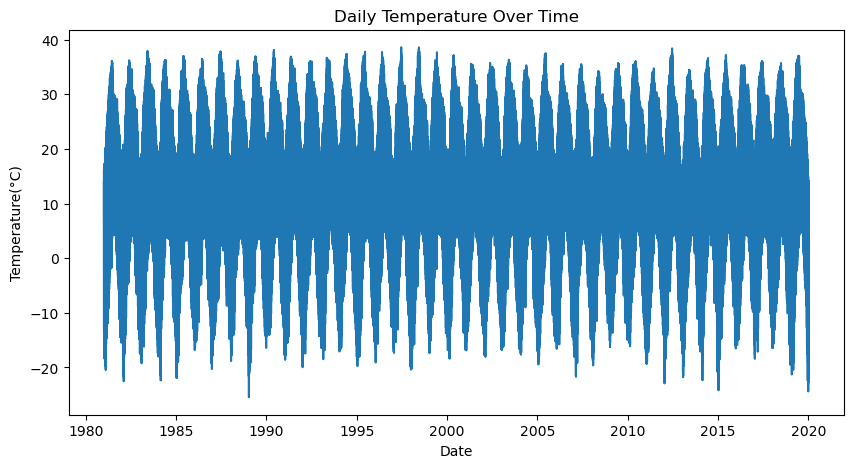

In [23]:
# to plot temperature over time for an overview

#sort by date if not sorted
df = df.sort_values('Date')

#plot
plt.figure(figsize=(10,5)) #sets the plot size
plt.plot(df['Date'], df['Temp_2m']) #plots the line
plt.xlabel('Date')
plt.ylabel('Temperature(°C)')
plt.title('Daily Temperature Over Time')
plt.show() #displays in jupyter

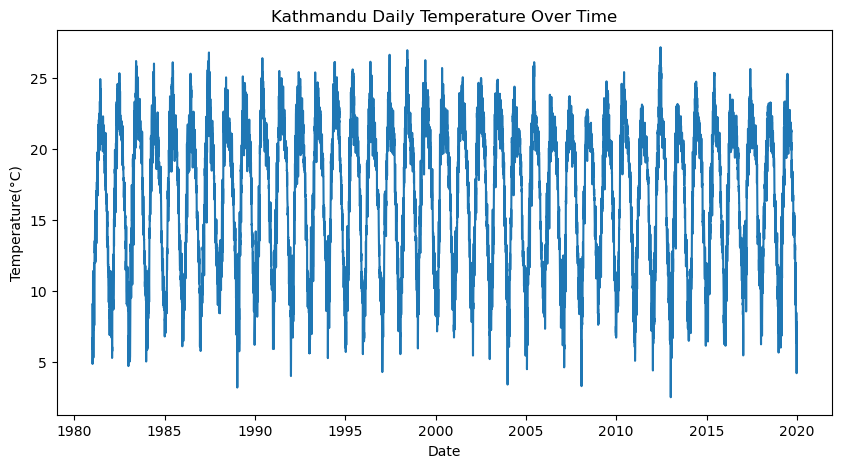

In [24]:
#to see temperature only for Kathmandu for example
#sort by date if not sorted
ktm_df = df[df['District']== 'Kathmandu']

#plot
plt.figure(figsize=(10,5))
plt.plot(ktm_df['Date'], ktm_df['Temp_2m']) 
plt.xlabel('Date')
plt.ylabel('Temperature(°C)')
plt.title('Kathmandu Daily Temperature Over Time')
plt.show() 

#  Basic Histogram 

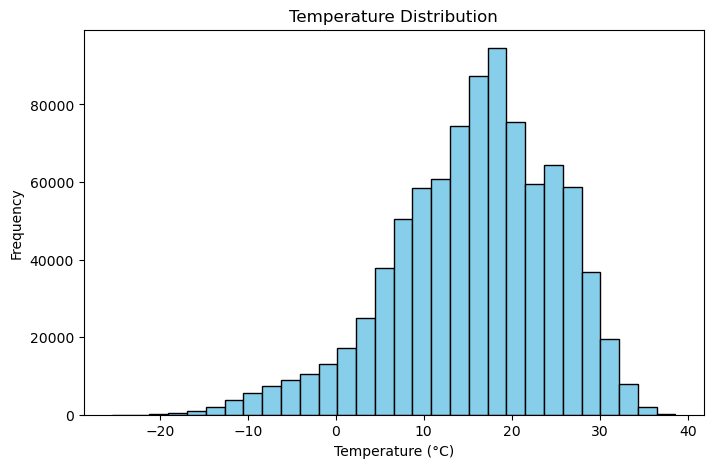

In [25]:
plt.figure(figsize=(8,5))
plt.hist(df['Temp_2m'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

# Box plot
Let's see temperature spread

In [26]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


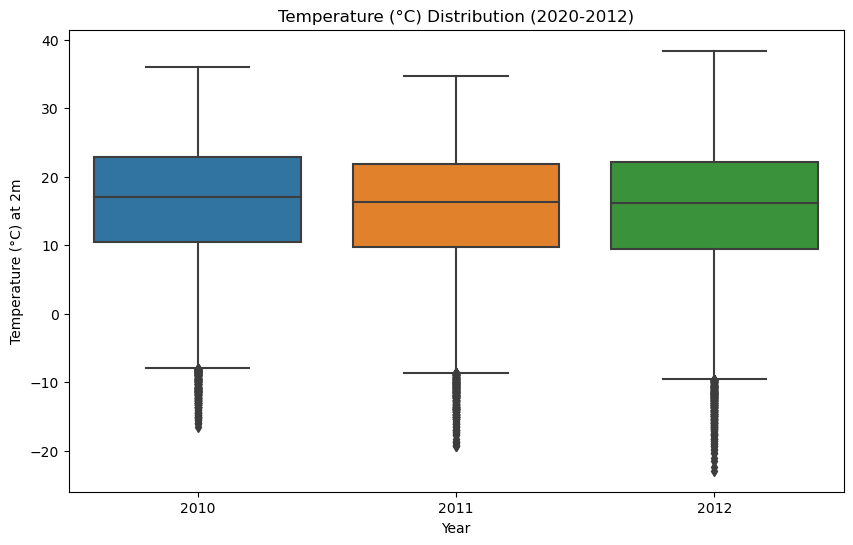

In [27]:
#boxplot shows median, quartiles and outliers
import seaborn as sns

plt.figure(figsize=(10,6))
filtered_df =df[df['Year'].isin([2010,2011,2012])]
sns.boxplot(x='Year', y='Temp_2m', data=filtered_df)
plt.ylabel('Temperature (°C) at 2m')
plt.title('Temperature (°C) Distribution (2020-2012)')
plt.show()

# Humidity vs Temperature Scatter Plot
Shows correlation between temperature and humidity

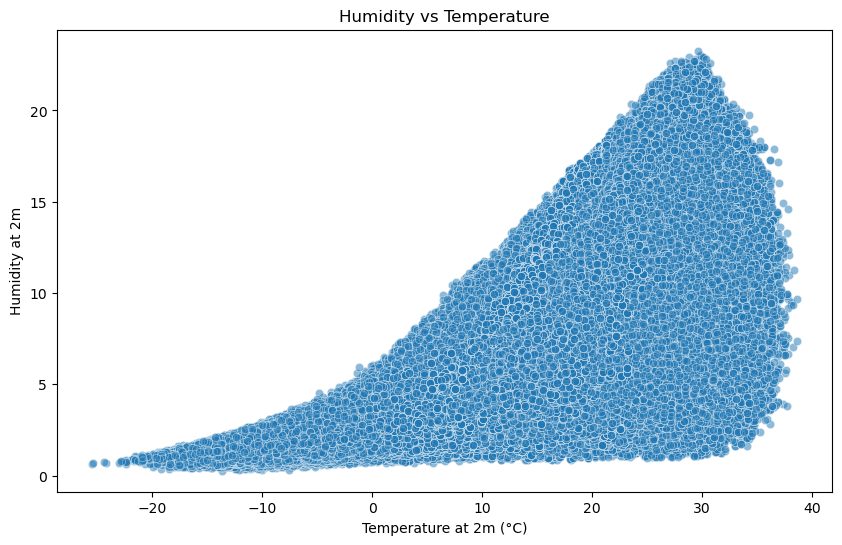

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temp_2m', y='Humidity_2m', data=df, alpha=0.5)
plt.title("Humidity vs Temperature")
plt.xlabel("Temperature at 2m (°C)")
plt.ylabel("Humidity at 2m")
plt.show()

#  Pressure Distribution
Shows distribution of atmospheric pressure to identify typical and extreme values

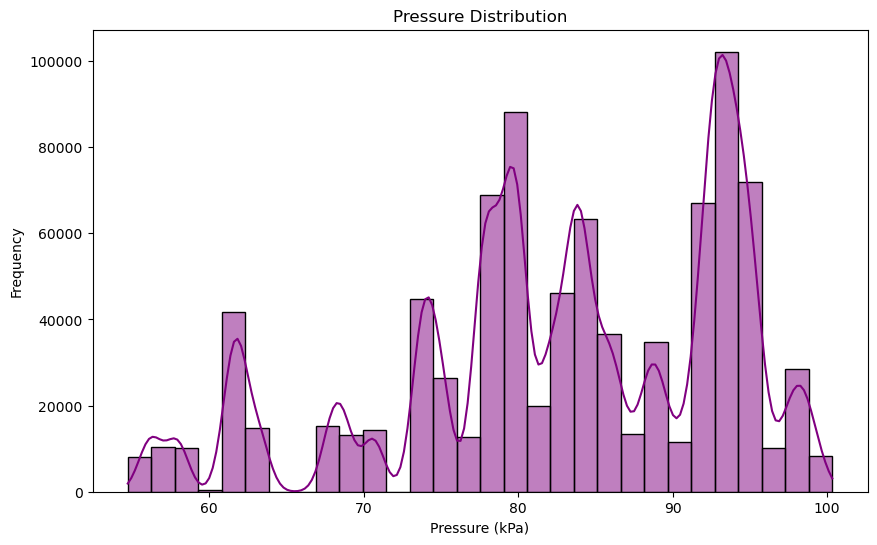

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['Pressure'], bins=30, kde=True, color='Purple')
plt.title("Pressure Distribution")
plt.xlabel("Pressure (kPa)")
plt.ylabel('Frequency')
plt.show()

# Windspeed Comparison at 10m vs 50m
Shows relationship between wind speeds at two heights.

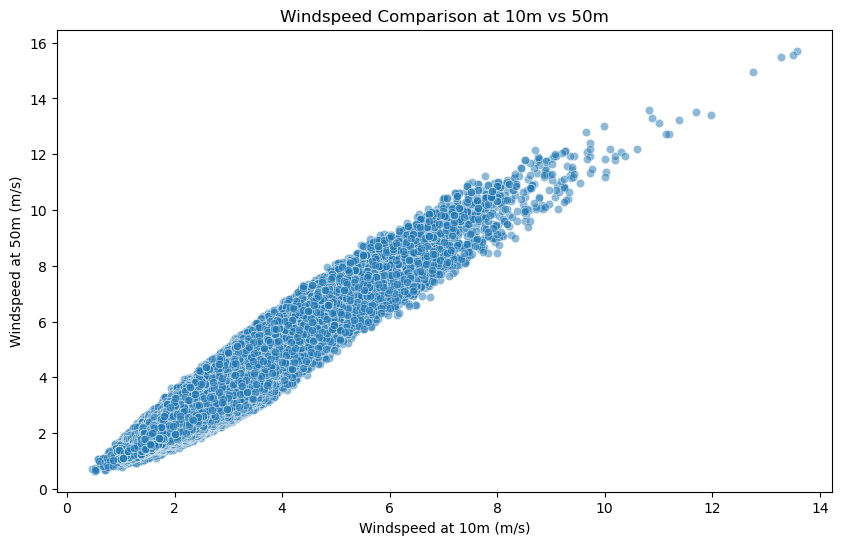

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='WindSpeed_10m', y='WindSpeed_50m', data=df, alpha=0.5)
plt.title("Windspeed Comparison at 10m vs 50m")
plt.xlabel("Windspeed at 10m (m/s)")
plt.ylabel('Windspeed at 50m (m/s)')
plt.show()

#  Boxplot of Wind Speed by District
Shows wind speed distribution per district. Boxplots make it easy to compare medians, ranges, and outliers district-wise.

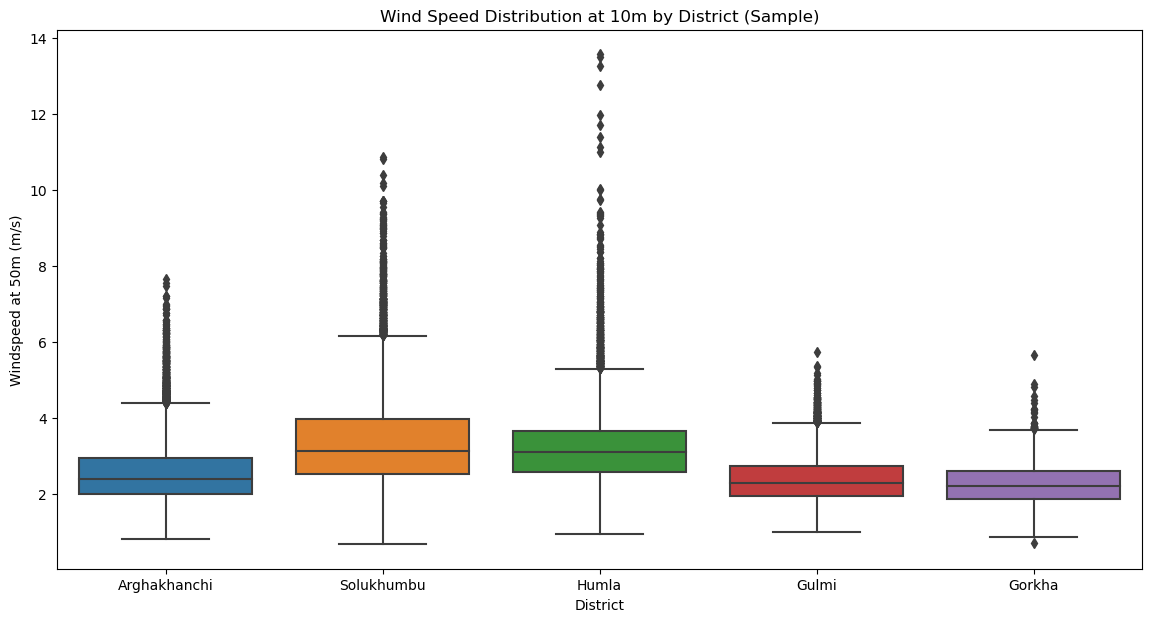

In [31]:
sample_districts = df['District'].unique()[:5] #to take first 5 istricts for clear plot

sample_df =df[df['District'].isin(sample_districts)]
plt.figure(figsize=(14,7))
sns.boxplot(x='District', y='WindSpeed_10m', data=sample_df)
plt.title("Wind Speed Distribution at 10m by District (Sample)")
plt.xlabel("District")
plt.ylabel('Windspeed at 50m (m/s)')
plt.show()

# Heatmap of Correlations

Displays correlation between all numeric variables.

Correlation ranges from -1 to +1:

+1 → perfect positive correlation (when one increases, other increases proportionally)

-1 → perfect negative correlation (when one increases, other decreases proportionally)

0 → no linear correlation between variables

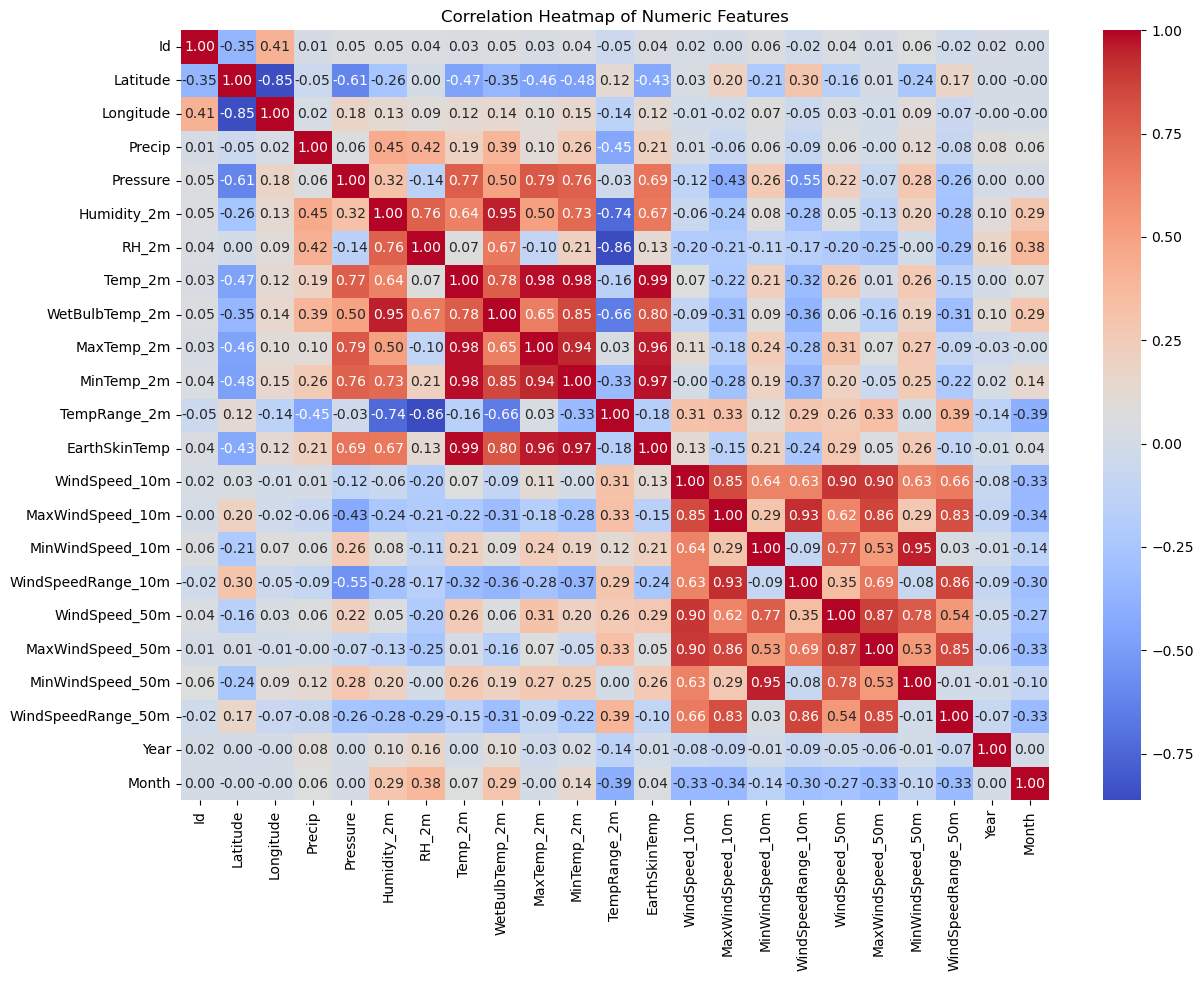

In [32]:
plt.figure(figsize=(14,10))   # Sets the figure size for better visibility

sns.heatmap(df.corr(),        # Creates a heatmap of the correlation matrix
            annot=True,       # Shows the correlation values as annotations
            cmap='coolwarm',  # Sets the color palette: blue for negative, red for positive
            fmt=".2f")        # Formats the annotation numbers to 2 decimal places

plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Time Series Analysis - Temperature Trend Over Time
We will analyze how temperature has changed over the years


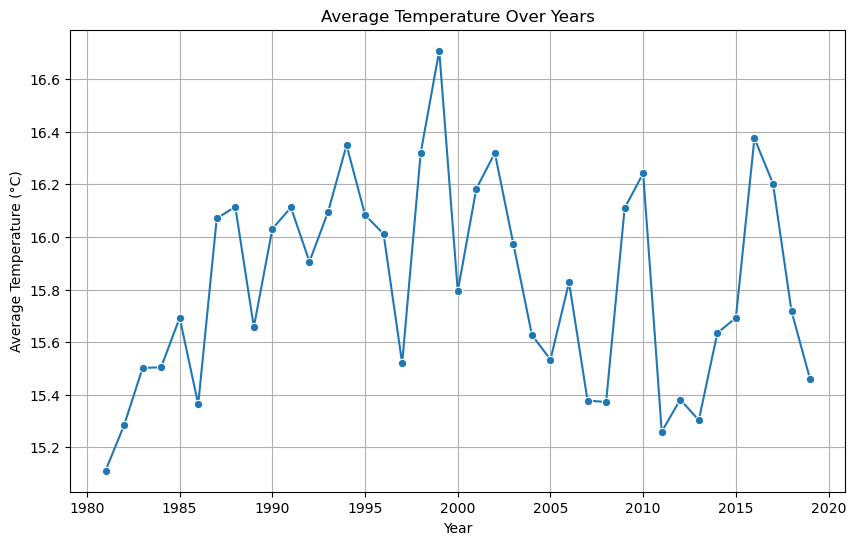

In [33]:
#convert date column to datetime
df['Date'] =pd.to_datetime(df['Date'])

#Extract year from Date
df['Year'] = df['Date'].dt.year

#group by year and calculate average temperature
avg_temp_per_year = df.groupby('Year')['Temp_2m'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Temp_2m", data=avg_temp_per_year, marker="o")
plt.title("Average Temperature Over Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()

We can see that the average temperature was highest around late 1990's and lowest on early 1980's.

# Let’s analyze average temperature per district but only for data from 1990 onwards. 
* Filters data from 1990 onwards only
*  Calculates average temperature per district
*  Plots it clearly to compare districts by temperature

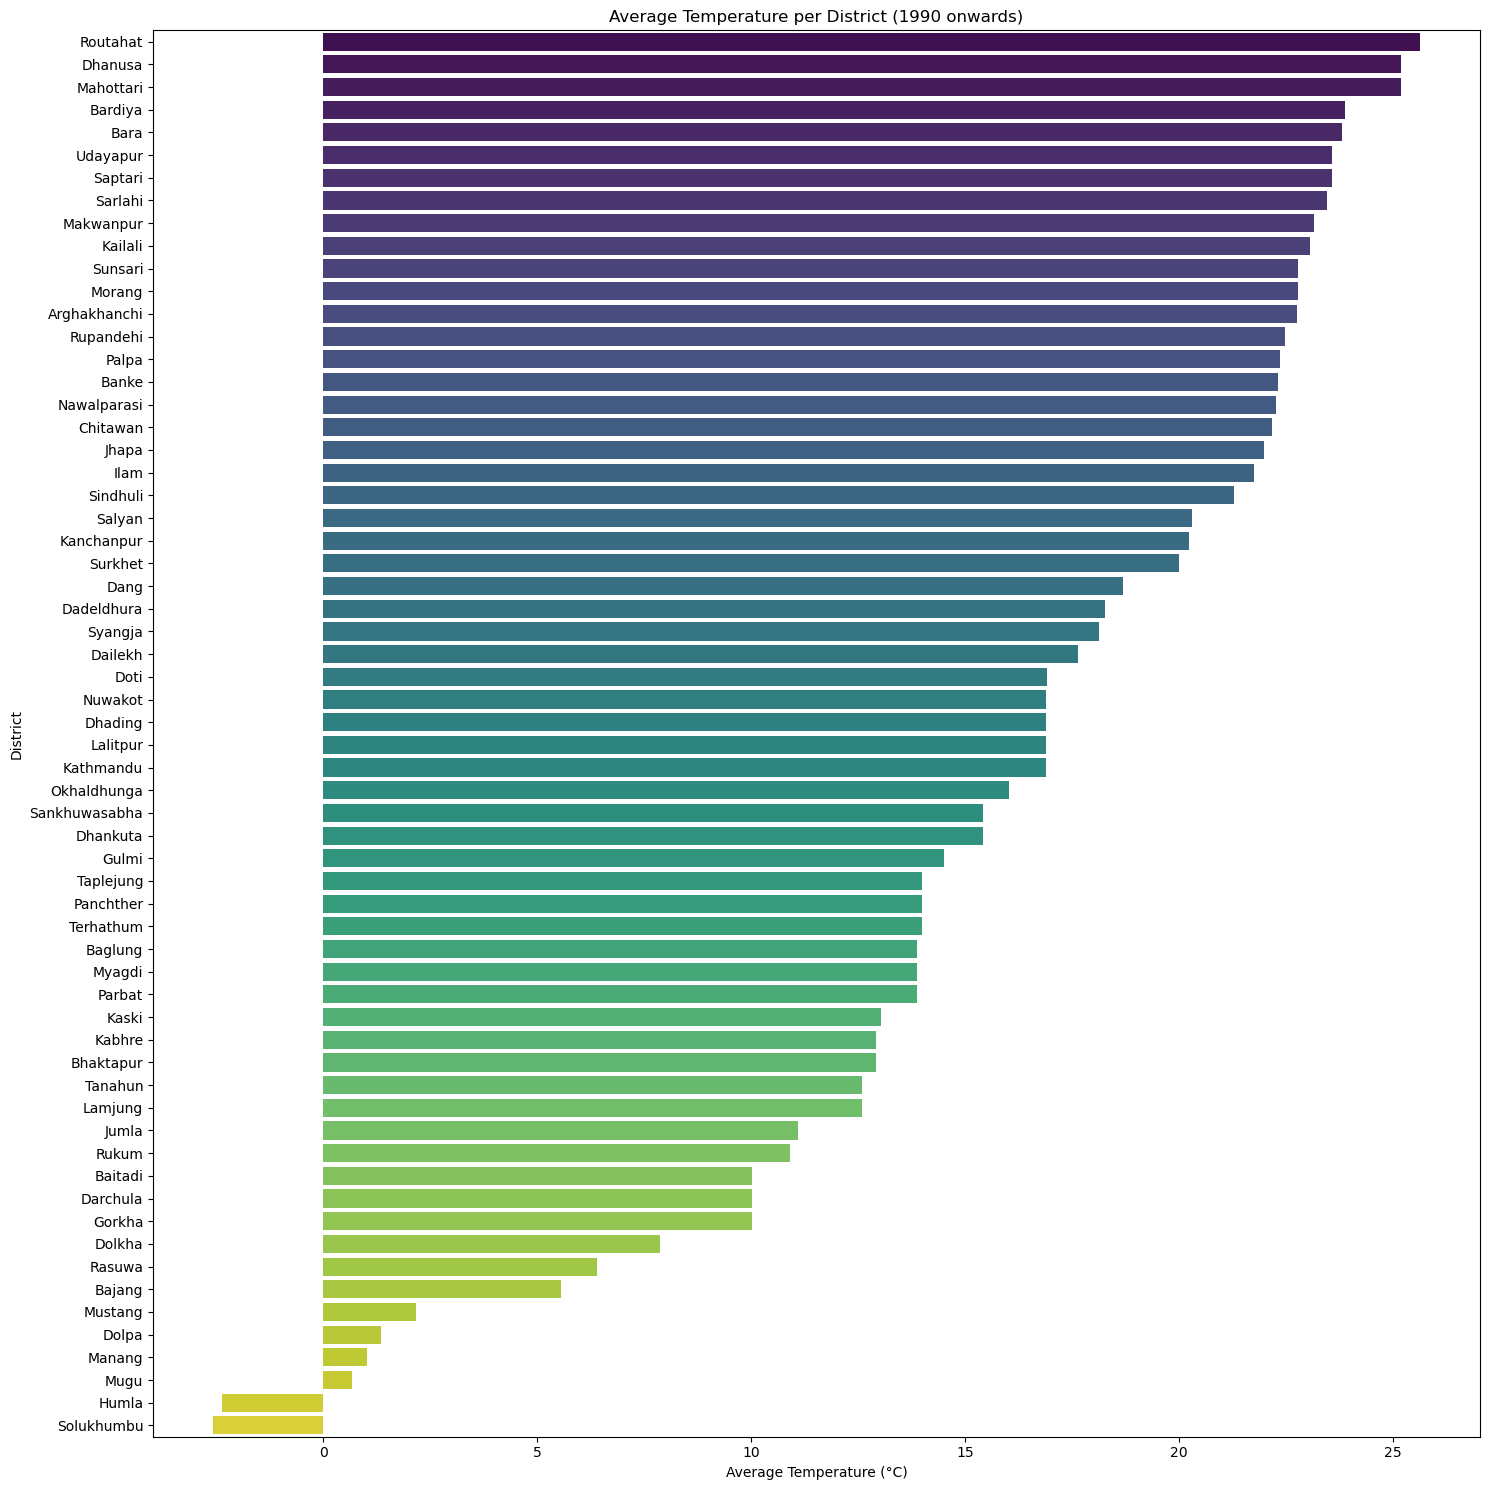

In [34]:
# I hve already done this previsuly , but I will do it again for more clarity
#convert date column to datetime
df['Date'] =pd.to_datetime(df['Date'])

#Extract year from Date
df['Year'] = df['Date'].dt.year

# now, i will filter data for year >=1990
df_1990_onwards = df[df['Year'] >= 1990]

avg_temp_per_district = df_1990_onwards.groupby('District')['Temp_2m'].mean().reset_index()
avg_temp_per_district = avg_temp_per_district.sort_values(by="Temp_2m", ascending=False) #Sorting allows clearer comparison when plotting.

plt.figure(figsize=(15,15))
sns.barplot(x='Temp_2m', y='District', data=avg_temp_per_district, palette='viridis')
plt.title("Average Temperature per District (1990 onwards)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("District")
plt.tight_layout()
plt.show()

Routahat seems to be the hottest district with it's growing temperature and solukhumbu has -°C temperature due to it being a mountain region.

#  District-wise Average Precipitation

To understand rainfall patterns across districts.
* Shows which districts have more rainfall on average.

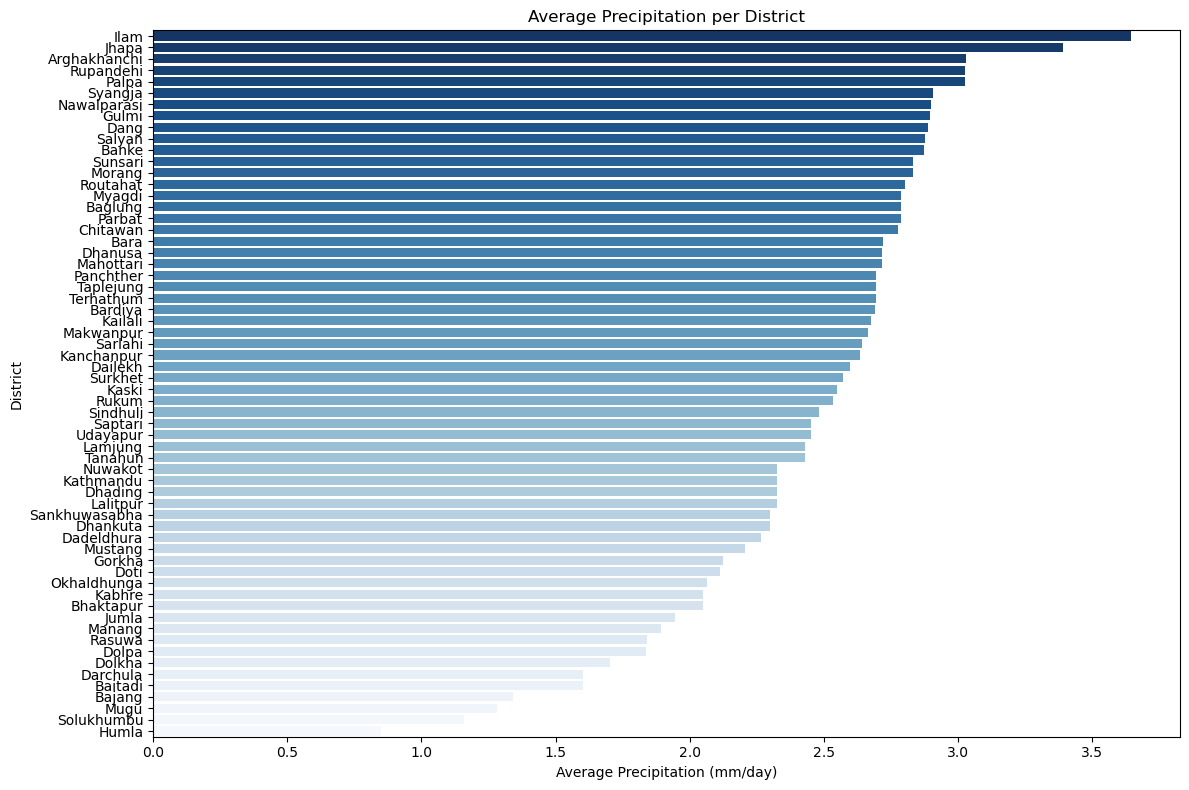

In [35]:
# Group by District to find average Precipitation
avg_precip_per_district = df.groupby("District")["Precip"].mean().reset_index()

# Sort by Precipitation
avg_precip_per_district = avg_precip_per_district.sort_values(by="Precip", ascending=False)

# Plotting
plt.figure(figsize=(12,8))
sns.barplot(x="Precip", y="District", data=avg_precip_per_district, palette="Blues_r")
plt.title("Average Precipitation per District")
plt.xlabel("Average Precipitation (mm/day)")
plt.ylabel("District")
plt.tight_layout()
plt.show()

Ilam has more amount of rainfall on average compared to other districts.

# Scatterplot: Temperature vs Humidity

Check correlation between temperature and humidity.
* Shows relationship patterns; e.g. if higher temperature reduces humidity.

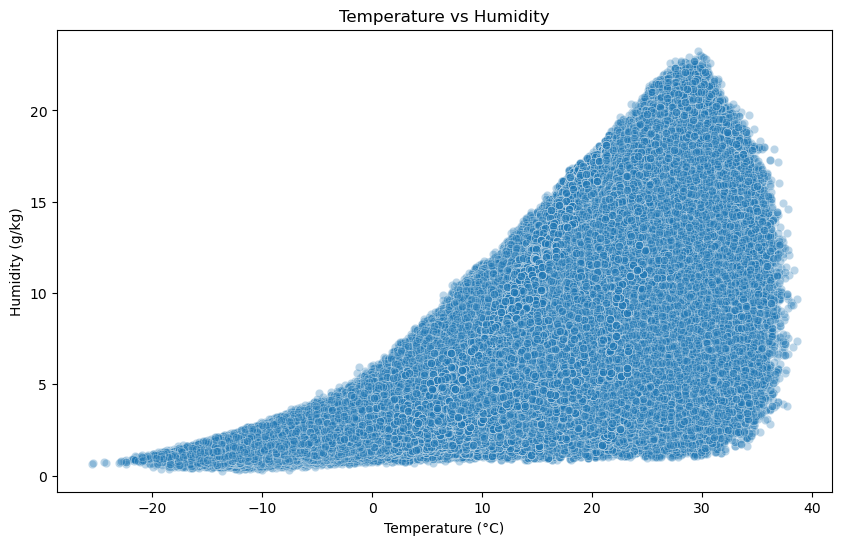

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Temp_2m", y="Humidity_2m", data=df, alpha=0.3)
plt.title("Temperature vs Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (g/kg)")
plt.show()

The scatter plot gives clear definition that higher the temerature, more the humidity and vice versa.

# Lineplot: Earth Skin Temperature Over Years
* Identifies long-term temperature changes on Earth's surface.

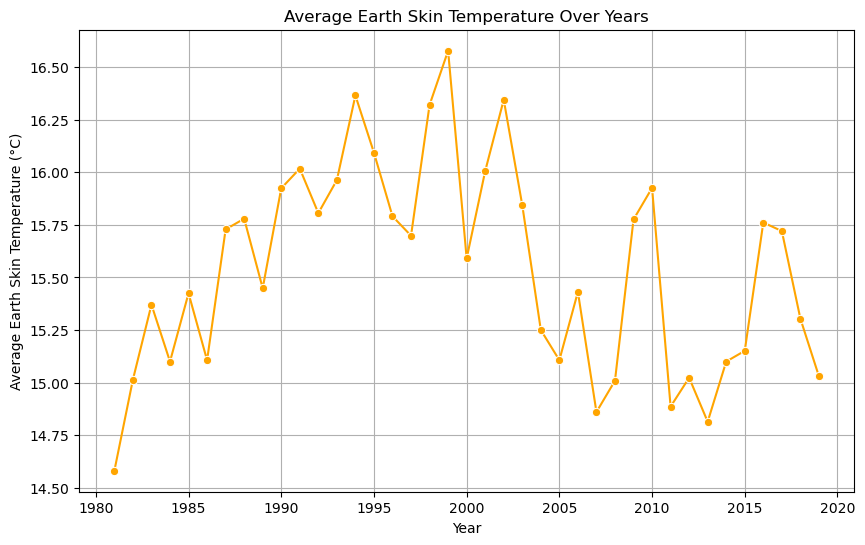

In [37]:
# Group by Year to calculate average EarthSkinTemp
avg_skin_temp_per_year = df.groupby("Year")["EarthSkinTemp"].mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="EarthSkinTemp", data=avg_skin_temp_per_year, marker="o", color="orange")
plt.title("Average Earth Skin Temperature Over Years")
plt.xlabel("Year")
plt.ylabel("Average Earth Skin Temperature (°C)")
plt.grid(True)
plt.show()

# Distribution of Wind Speed at 10m
To understand wind speed behaviour.
* Shows frequency and density of wind speeds.

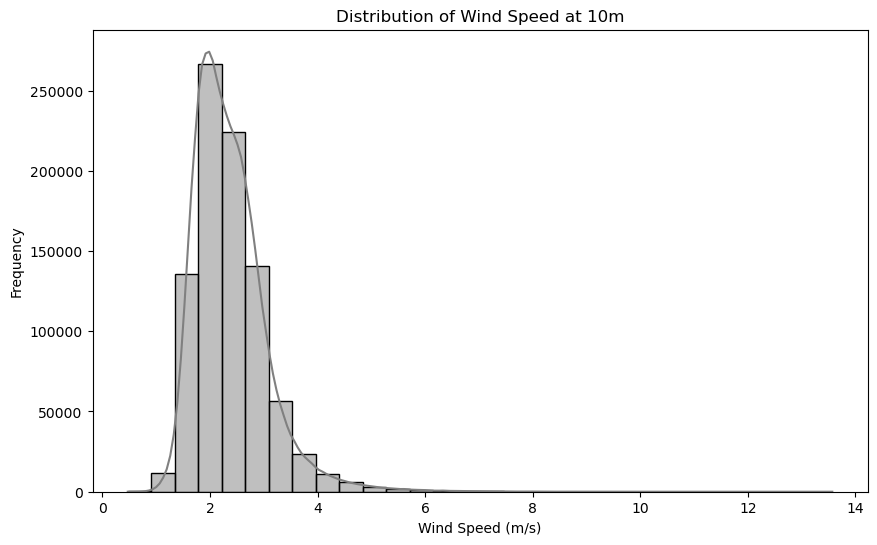

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df["WindSpeed_10m"], bins=30, kde=True, color="grey")
plt.title("Distribution of Wind Speed at 10m")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

#### The plot showed:

* Wind speeds mostly between 1 to 4 m/s

* Peak frequency around 2 m/s, with ~250,000 occurrences.

# Distribution of Maximum Temperature

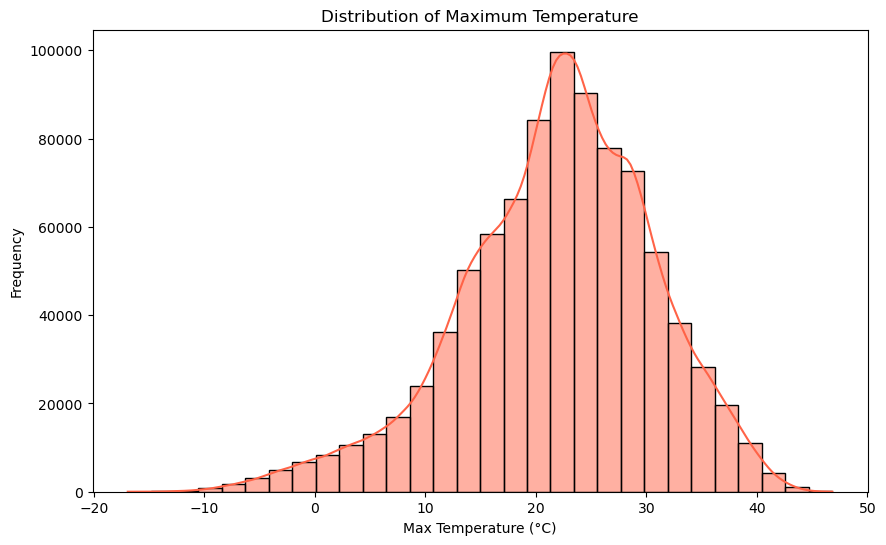

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(df['MaxTemp_2m'], bins=30, kde=True, color='tomato')
plt.title("Distribution of Maximum Temperature")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

#### The maximum temperature is shown to be arund 25°C.

# Average Humidity per District 

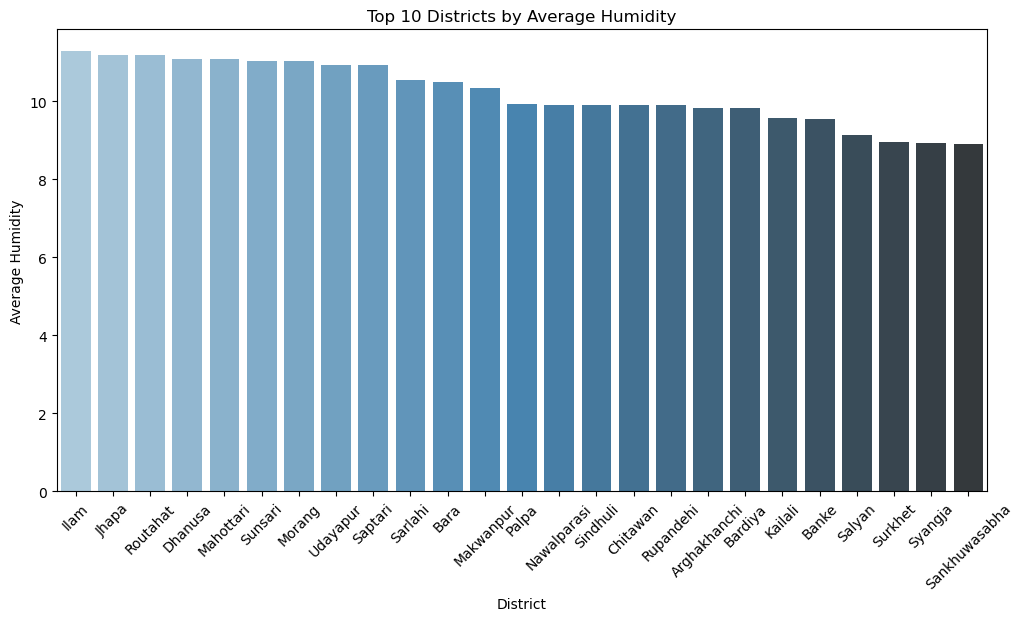

In [40]:
avg_humidity = df.groupby('District')['Humidity_2m'].mean().sort_values(ascending=False).head(25)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_humidity.index, y=avg_humidity.values, palette='Blues_d')
plt.title("Top 10 Districts by Average Humidity")
plt.xlabel("District")
plt.ylabel("Average Humidity")
plt.xticks(rotation=45)
plt.show()

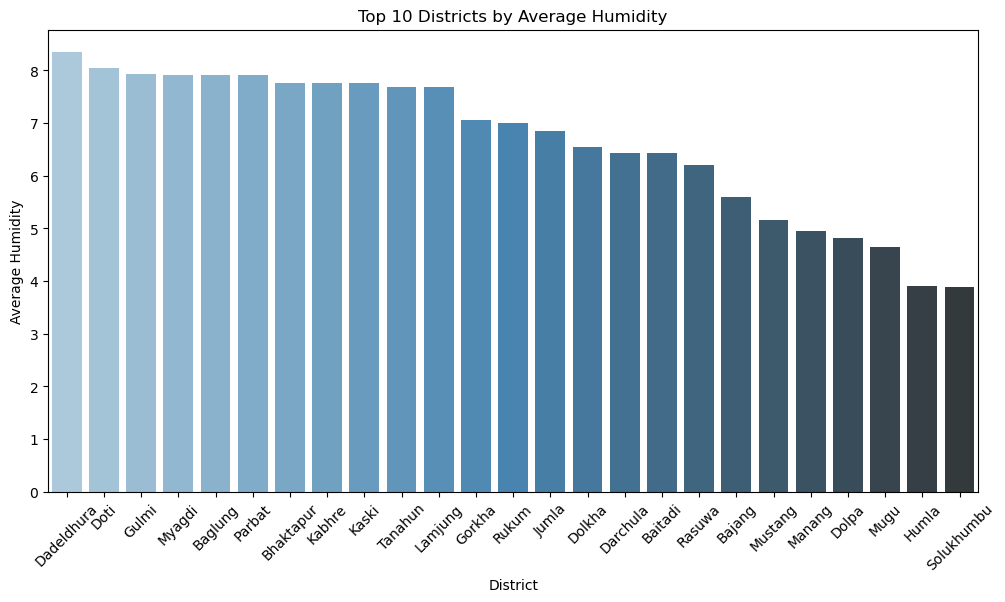

In [41]:
avg_humidity = df.groupby('District')['Humidity_2m'].mean().sort_values(ascending=False).tail(25)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_humidity.index, y=avg_humidity.values, palette='Blues_d')
plt.title("Top 10 Districts by Average Humidity")
plt.xlabel("District")
plt.ylabel("Average Humidity")
plt.xticks(rotation=45)
plt.show()

#### Illam has the highest average humidity folllowed closely by Jhapa, Routahat and Dhanusa with Solukhumbu and Humla having the lowest humidity on avearge.

In [42]:
pip install scikit-learn

In [44]:
import sklearn
print(sklearn.__version__)

1.0.2


## What is Linear Regression?
Linear regression is a simple ML model that assumes a linear relationship between input features (e.g., temperature, humidity) and the target variable (e.g., precipitation). It’s a great starting point because it’s interpretable and easy to implement.

* Equation:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$$

* $ y $: Target variable (e.g., Precip).
* $ x_1, x_2, \dots, x_n $: Features (e.g., Temp_2m, Humidity_2m).
*$ \beta_0 $: Intercept (baseline value of $ y $ when all features are 0).
* $ \beta_1, \beta_2, \dots, \beta_n $: Coefficients (weights) for each feature, indicating their impact on $ y $.


* Goal: Find the best $ \beta $ values to minimize the Mean Squared Error (MSE):
$$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$
where $ y_i $ is the actual value and $ \hat{y}_i $ is the predicted value.

### Preprocessing
For linear regression, we need to:

* Select numerical features to avoid complex encoding initially.
* Handle categorical features (District, Date) simply.
* Split data into training and testing sets.
* Handle missing values (if any).

### Features and Target:

* Target: Precip (precipitation in mm/day).
* Features: Use numerical columns like Latitude, Longitude, Pressure, Humidity_2m, RH_2m, Temp_2m, MaxTemp_2m, MinTemp_2m, WindSpeed_10m, etc.
* Date: Extract year, month, and day as numerical features to capture temporal patterns.
* District: Use label encoding for simplicity (assigns a number to each district).

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883128 entries, 0 to 883127
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Id                  883128 non-null  int64         
 1   Date                883128 non-null  datetime64[ns]
 2   District            883128 non-null  object        
 3   Latitude            883128 non-null  float64       
 4   Longitude           883128 non-null  float64       
 5   Precip              883128 non-null  float64       
 6   Pressure            883128 non-null  float64       
 7   Humidity_2m         883128 non-null  float64       
 8   RH_2m               883128 non-null  float64       
 9   Temp_2m             883128 non-null  float64       
 10  WetBulbTemp_2m      883128 non-null  float64       
 11  MaxTemp_2m          883128 non-null  float64       
 12  MinTemp_2m          883128 non-null  float64       
 13  TempRange_2m        883128 no

Linear Regression Results:
Mean Squared Error (MSE): 25.6069
Mean Absolute Error (MAE): 2.5401
R² Score: 0.2868

Feature Coefficients:
District: 0.0631
Latitude: -0.1389
Longitude: -0.4627
Pressure: 0.5976
Humidity_2m: 1.7816
RH_2m: -0.3167
Temp_2m: 7.9929
MaxTemp_2m: -10.5057
MinTemp_2m: 1.8193
WindSpeed_10m: 0.5908
Year: 0.1140
Month: 52.3674
Day: 4.4513
DayOfYear: -53.1816


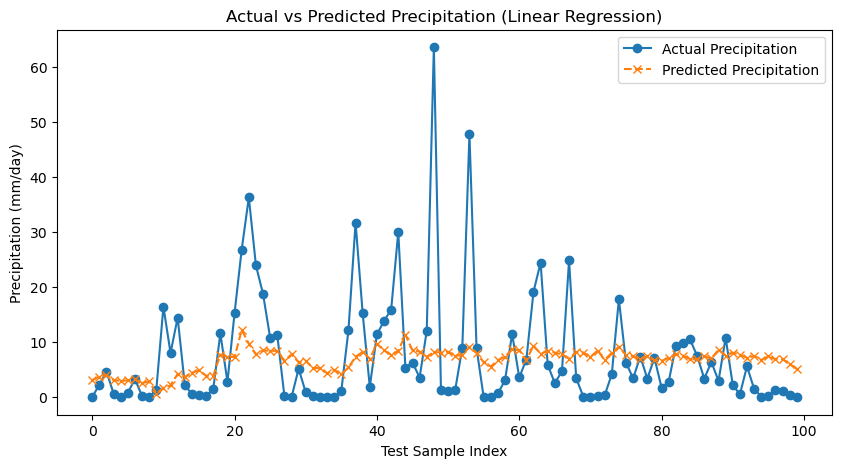

In [50]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("dailyclimate.csv")

# Parse Date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfYear'] = df['Date'].dt.dayofyear

# Encode District
le = LabelEncoder()
df['District'] = le.fit_transform(df['District'])

# Select features and target
features = ['District', 'Latitude', 'Longitude', 'Pressure', 'Humidity_2m', 'RH_2m',
            'Temp_2m', 'MaxTemp_2m', 'MinTemp_2m', 'WindSpeed_10m', 'Year', 'Month', 'Day', 'DayOfYear']
X = df[features]
y = df['Precip']

# Handle missing values (if any)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Chronological train-test split
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Clip negative predictions
y_pred_lr = np.maximum(0, y_pred_lr)

# Evaluate model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f'Mean Squared Error (MSE): {mse_lr:.4f}')
print(f'Mean Absolute Error (MAE): {mae_lr:.4f}')
print(f'R² Score: {r2_lr:.4f}')

# Interpret coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(features, lr_model.coef_):
    print(f"{feature}: {coef:.4f}")

# Visualize results
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual Precipitation', marker='o', linestyle='-')
plt.plot(y_pred_lr[:100], label='Predicted Precipitation', marker='x', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Precipitation (Linear Regression)')
plt.xlabel('Test Sample Index')
plt.ylabel('Precipitation (mm/day)')
plt.show()

# Linear Regression Results Analysis
#### Plot: Actual vs Predicted Precipitation

* Image: Shows actual (blue circles) vs. predicted (orange crosses) precipitation for the first 100 test samples.
* Observation:
   * Actual precipitation has sharp peaks (e.g., ~60 mm/day), likely monsoon events.
   * Predicted values are flatter and fail to capture these peaks, staying closer to 0–10 mm/day.
* Insight: Linear regression struggles with non-linear patterns and extreme values, indicating its simplicity limits accuracy for precipitation.

#### Metrics
* Mean Squared Error (MSE): 25.6069
   * Measures average squared error in (mm/day)².
   * Value suggests some large errors (e.g., missing peaks), but not extreme given precipitation variability.
* Mean Absolute Error (MAE): 2.5401 mm/day
   * Average error in mm/day, a practical metric.
   * Decent for a baseline model; if mean precipitation is ~5 mm/day, it’s off by ~50%.
* R² Score: 0.2868
   * Explains 28.68% of variance, typical for noisy climate data.
   * Low value reflects linear regression’s inability to model complex patterns (e.g., seasonal spikes).
* Insight: Metrics show moderate performance, with room for improvement using non-linear models.


#### Feature Coefficients
* District: 0.0631
   * Slight positive effect; district variation has minor impact.
* Latitude: -0.1389
   * Higher latitude slightly reduces precipitation (southern areas may get more rain).
* Longitude: -0.4627
  * Higher longitude reduces precipitation (west-to-east gradient).
* Pressure: 0.5976
  * Higher pressure increases precipitation (unexpected; may indicate multicollinearity).
* Humidity_2m: 1.7816
  * Strong positive effect; higher humidity boosts precipitation (meteorologically sound).
* RH_2m: -0.3167
  * Negative effect; may reflect interaction with other variables (e.g., temperature).
* Temp_2m: 7.9929
   * Strong positive effect; warmer temperatures increase precipitation.
* MaxTemp_2m: -10.5057
   * Strong negative effect; higher max temperatures reduce precipitation (possibly counteracting Temp_2m).
* MinTemp_2m: 1.8193
   * Positive effect; higher minimums increase precipitation.
* WindSpeed_10m: 0.5908
   * Positive effect; stronger winds may enhance rain.
* Year: 0.1140
   * Slight increase over time (possible climate change signal).
* Month: 52.3674
   * Large positive effect; seasonal variation (e.g., monsoon months) drives precipitation.
* Day: 4.4513
   * Positive effect; daily variation within months matters.
* DayOfYear: -53.1816
   * Large negative effect; may reflect cyclical pattern (e.g., non-monsoon months).

#### Interpretation
* Performance: MSE and MAE indicate moderate errors, but R² (0.2868) shows linear regression captures only ~29% of variance. The plot confirms it misses extreme precipitation events.
* Feature Impact: Seasonal features (Month, DayOfYear) and climate variables (Humidity_2m, Temp_2m) are key drivers. Negative coefficients for MaxTemp_2m and DayOfYear may reflect complex interactions.
* Limitations: Linear assumption fails for non-linear patterns (e.g., monsoon peaks), explaining the flat predictions.